In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os

In [4]:
path_to_eppy = '/opt/conda/lib/python3.11/site-packages/eppy'
sys.path.append(path_to_eppy)

In [5]:
from eppy import modeleditor
from eppy.modeleditor import IDF

workdir_root = os.path.join(os.path.expanduser('~'), 'fs24.git')
iddfile = workdir_root + '/libs/Energy+.idd'
IDF.setiddname(iddfile)

In [6]:
idffile = workdir_root + '/original/Case950.idf'
epwfile = workdir_root + '/data/USA_CO_Golden-NREL.724666_TMY3.epw'

idf = IDF(idffile, epwfile)

In [7]:
idf.printidf()


VERSION,
    24.1;                     !- Version Identifier

Building,
    BESTEST Case 950,         !- Name
    0,                        !- North Axis
    Country,                  !- Terrain
    0.039999999,              !- Loads Convergence Tolerance Value
    0.0040000002,             !- Temperature Convergence Tolerance Value
    FullInteriorAndExterior,    !- Solar Distribution
    ,                         !- Maximum Number of Warmup Days
    6;                        !- Minimum Number of Warmup Days

ShadowCalculation,
    PolygonClipping,          !- Shading Calculation Method
    Periodic,                 !- Shading Calculation Update Frequency Method
    1;                        !- Shading Calculation Update Frequency

SurfaceConvectionAlgorithm:Inside,
    TARP;                     !- Algorithm

SurfaceConvectionAlgorithm:Outside,
    DOE-2;                    !- Algorithm

Timestep,
    4;                        !- Number of Timesteps per Hour

Site:Location,
    GOLDE

In [8]:
idf.run(verbose='q', readvars=True) # 'v: verbose, q: quiet'

EnergyPlus Completed Successfully.


The Zone Mean Air Temperature  averages at 9.45 C with a total of 82790.2 C.
The Zone Air System Sensible Heating Energy  averages at 0.0 J with a total of 0.0 J.
The Zone Air System Sensible Cooling Energy  averages at 1105.27 J with a total of 9682184.85 J.


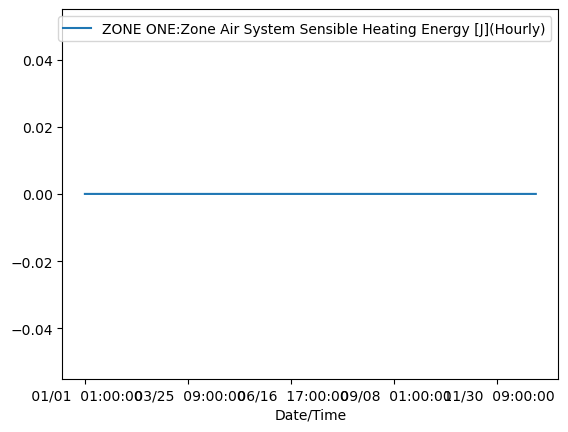

In [9]:
def get_outcome(outcome_path):
    
    outcome = pd.read_csv(outcome_path, index_col=[0])

    for column in outcome.columns:

        outcome.plot(y=column)

        columnname = column.split(':')[1].split('[')[0]
        unit = column.split(':')[1].split('[')[1].split(']')[0]
        average = round(outcome[column].mean(), 2)
        total = round(outcome[column].sum(), 2)
        
        print(f'The {columnname} averages at {average} {unit} with a total of {total} {unit}.')
    
get_outcome(workdir_root + '/eplusout.csv')